## Equilibrio de Hardy-Weinberg en un locus con dos alelos

**Ejemplo:**

Imagina que tomas una muestra de 100 individuos de una población (de una especie $X_1$), para analizar un locus con dos alelos A y a.

Al realizar las pruebas para identificar los genotipos, obtienes el siguiente conteo:

Genotipos observados:

AA = 45

Aa = 40

aa = 15

Para comprobar si esta población se encuentra en equilibrio de H-W decides analizar tus datos utilizando Python:

In [3]:
# Paso 1: Librerías necesarias
import pandas as pd
from scipy.stats import chisquare

In [4]:
# Paso 2: Datos observados de la población
# Ejemplo:
# Conteos de genotipos
obs_counts = {"AA": 45, "Aa": 40, "aa": 15}

In [5]:
# Convertir a DataFrame para verlo bonito
df_obs = pd.DataFrame.from_dict(obs_counts, orient="index", columns=["Observados"])
print("Genotipos observados:")
display(df_obs)

Genotipos observados:


,Observados
AA,45
Aa,40
aa,15


In [6]:
# Paso 3: Calcular frecuencias alélicas
n = sum(obs_counts.values())
p = (2*obs_counts["AA"] + obs_counts["Aa"]) / (2*n)  # frecuencia del alelo A
q = 1 - p                                           # frecuencia del alelo a

print(f"\nFrecuencia p (A): {p:.3f}")
print(f"Frecuencia q (a): {q:.3f}")


Frecuencia p (A): 0.650
Frecuencia q (a): 0.350


In [7]:
# Paso 4: Calcular frecuencias esperadas bajo H-W
exp_freqs = {"AA": p**2, "Aa": 2*p*q, "aa": q**2}
exp_counts = {g: f*n for g, f in exp_freqs.items()}

df_exp = pd.DataFrame.from_dict(exp_counts, orient="index", columns=["Esperados"])
print("\nGenotipos esperados (Hardy-Weinberg):")
display(df_exp)


Genotipos esperados (Hardy-Weinberg):


,Esperados
AA,42.25
Aa,45.50
aa,12.25


In [8]:
# Paso 5: Comparación estadística con Chi-cuadrado
observados = list(obs_counts.values())
esperados = list(exp_counts.values())

chi2, pval = chisquare(f_obs=observados, f_exp=esperados)

print("\n📊 Test Chi-cuadrado:")
print(f"Chi² = {chi2:.3f}, p-valor = {pval:.3f}")

if pval > 0.05:
    print("✅ No hay evidencia significativa de desviación: la población está en equilibrio H-W.")
else:
    print("⚠️ La población se desvía del equilibrio H-W (posibles fuerzas evolutivas en acción).")


📊 Test Chi-cuadrado:
Chi² = 1.461, p-valor = 0.482
✅ No hay evidencia significativa de desviación: la población está en equilibrio H-W.


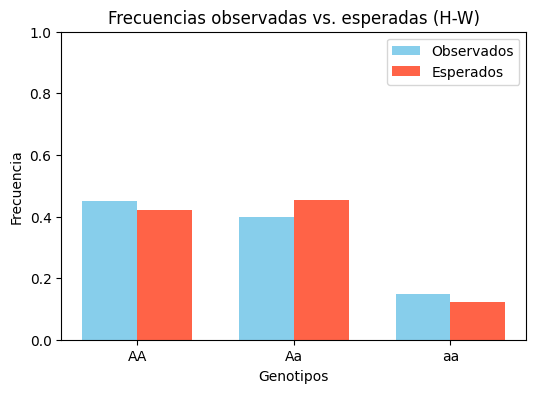

In [9]:
# Paso 6: Barplot

import matplotlib.pyplot as plt
import numpy as np

# Datos del ejemplo (conteos absolutos)
obs_counts = np.array([45, 40, 15])   # AA, Aa, aa
exp_counts = np.array([42.25, 45.50, 12.25])   # valores esperados bajo H-W
labels = ["AA", "Aa", "aa"]

# Convertir a frecuencias
obs_freqs = obs_counts / obs_counts.sum()
exp_freqs = exp_counts / exp_counts.sum()

# Posición de las barras
x = np.arange(len(labels))
width = 0.35  # ancho de cada barra

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 4))

# Barras observadas y esperadas (en frecuencias)
bars1 = ax.bar(x - width/2, obs_freqs, width, label="Observados", color="skyblue")
bars2 = ax.bar(x + width/2, exp_freqs, width, label="Esperados", color="tomato")

# Personalización
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Genotipos")
ax.set_title("Frecuencias observadas vs. esperadas (H-W)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)   # Escala de 0 a 1
ax.legend()

# Mostrar gráfico
plt.show()


## Nota:

In [2]:
# Información de versión para reproducibilidad

import sys, jupyterlab, platform, Bio, pandas, matplotlib
print("Python:", sys.version)
print("JupyterLab:", jupyterlab.__version__)
print("Sistema:", platform.platform())
print("Biopython:", Bio.__version__)
print("Pandas:", pandas.__version__)
print("Matplotlib:", matplotlib.__version__)

Python: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
JupyterLab: 4.4.7
Sistema: Linux-6.14.0-29-generic-x86_64-with-glibc2.39
Biopython: 1.85
Pandas: 2.3.2
Matplotlib: 3.10.6
